In [1]:
!pip install biokit

     |████████████████████████████████| 198 kB 8.2 MB/s 
     |████████████████████████████████| 55 kB 5.3 MB/s 
     |████████████████████████████████| 205 kB 60.4 MB/s 
     |████████████████████████████████| 2.3 MB 50.2 MB/s 
     |████████████████████████████████| 47 kB 6.6 MB/s 
     |████████████████████████████████| 9.9 MB 11.9 MB/s 
     |████████████████████████████████| 255 kB 72.7 MB/s 
     |████████████████████████████████| 5.8 MB 31.2 MB/s 
     |████████████████████████████████| 251 kB 62.3 MB/s 
     |████████████████████████████████| 636 kB 39.4 MB/s 
  Created wheel for biokit: filename=biokit-0.4.6-py3-none-any.whl size=212722 sha256=23d5eccb3674ebe71adb25310f516478bb578e986b8d436d86f3a53001614783
  Stored in directory: /root/.cache/pip/wheels/f2/c8/20/a1ef10b88c38de88f3abbe632a6fb3de17dc3088bff6cf568c
  Created wheel for bioservices: filename=bioservices-1.7.12-py3-none-any.whl size=237514 sha256=c5d0d167801ea2c50a3ef15cd93a277955f49b7d54585639daab79f79dc5c56b
  Sto

In [2]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [3]:
url = "https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv"

df = pd.read_csv(url)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

Creating directory /root/.config/biokit 
Creating directory /root/.config/bioservices 


/usr/local/lib/python3.7/dist-packages/biokit/viz/corrplot.py:335: MatplotlibDeprecationWarning:


The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.



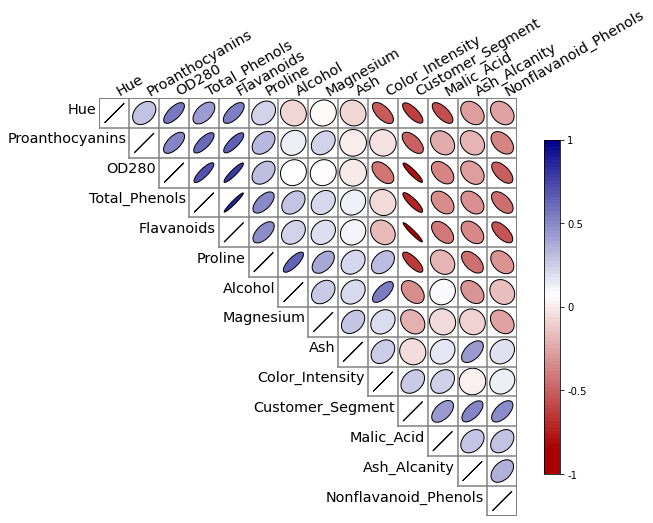

In [5]:
## Matriz de correlação entre as features:

matriz_corr = df.corr()

grafico_corr = corrplot.Corrplot(matriz_corr)
grafico_corr.plot(upper = 'ellipse', fontsize = 'x-large')

fig = plt.gcf()
fig.set_size_inches(14,10)
fig.show()

Correlação positiva: Se um aumenta, o outro aumenta;

Correlação negativa: Se um diminui, o outro aumenta.

Podemos ver que Total_Phenols tem uma correlação muito grande com Flavanoids, que pode conter muita informação redundante. Podemos retirar um deles se necessário.

In [6]:
### Normalização dos dados:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_normalizado = scaler.fit_transform(df) ## Retorna um numpy Array
df_normalizado = pd.DataFrame(data=df_normalizado, columns=df.keys()) ## Transforma em DataFrame

df_normalizado.head()

# ou manualmente (min_max_scaler):
#atributos = df.columns
#for atributo in atributos:
#    df_normalizado[atributo] = (df[atributo] - min(df[atributo])) / (max(df[atributo]) - min(df[atributo]))

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-1.213944
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-1.213944
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-1.213944
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-1.213944
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.213944


Após a normalização dos dados, podemos iniciar a clusterização:

In [27]:
### K-Means
### Bom quando os grupos podem ser bem separados com uma simetria radial.
from sklearn.cluster import KMeans

dados = df_normalizado

agrupador = KMeans(n_clusters = 3) ## n_clusters = qtd de grupos
agrupador.fit(dados)

grupos = agrupador.labels_
print(grupos)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [28]:
centros = pd.DataFrame(agrupador.cluster_centers_, columns=df.keys())
centros.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,0.878097,-0.304576,0.318942,-0.664524,0.564888,0.876505,0.943639,-0.585590,0.581783,0.167188,0.483728,0.767053,1.158347,-1.171521
1,-0.922126,-0.378889,-0.465688,0.175507,-0.470251,-0.073934,0.044288,0.008761,0.018265,-0.862278,0.424503,0.249782,-0.765250,0.079960
2,0.186543,0.904971,0.249210,0.583703,-0.050635,-0.988557,-1.236195,0.716842,-0.749608,0.988498,-1.191299,-1.301540,-0.380045,1.347458


In [29]:
## Gráfico cluster relacionando a intensidade da cor com a quantidade de alcool de cada grupo:

fig = go.Figure()
fig.add_trace(go.Scatter(x = df_normalizado['Color_Intensity'], y = df_normalizado['Alcohol'], 
                            mode = 'markers',
                            marker = dict(color = agrupador.labels_.astype(np.float)),
                            text = grupos,
                         ))
fig.update_layout(scene = dict(
    xaxis_title = "Intensidade de cor",
    yaxis_title = "Álcool"
))
fig.show()

In [30]:
## Gráfico em 3D:

fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df_normalizado['Color_Intensity'], y = df_normalizado['Alcohol'], z = df_normalizado['Proline'],
                            mode = 'markers',
                            marker = dict(color = agrupador.labels_.astype(np.float)),
                            text = grupos
                         ))
fig.add_trace(go.Scatter3d(x = centros['Color_Intensity'], y = centros['Alcohol'], z = centros['Proline'],
                            mode = 'markers',
                            marker = dict(color = 'red'),
                            text = [0, 1, 2]
                         ))
fig.update_layout(scene = dict(
    xaxis_title = "Intensidade de cor",
    yaxis_title = "Álcool",
    zaxis_title = "Proline"
))
fig.show()

Podemos utilizar o K-means também para prever em qual grupo uma nova amostra se encaixaria:

In [11]:
nova_amostra = [[2, 0, 1.5, 27, 4, 14, 38, 0.7, 10, 1, 4, 16, 12, -1.2]]
print(agrupador.predict(nova_amostra))

[0]


Para avaliação do cluster, utilizaremos o Coeficiente de Silhueta:

In [31]:
from sklearn.metrics import silhouette_score

faixa_n_clusters = [i for i in range(2, 10)] # Variando o numero de clusteres de 2 até 9
valores_silhueta = []

In [32]:
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters = k)
    labels = agrupador.fit_predict(df_normalizado)

    media_silhueta = silhouette_score(df_normalizado, labels)

    valores_silhueta.append(media_silhueta)

In [33]:
valores_silhueta ## Score de cada KMeans com o valor de clusteres variando de 2 até 9

[0.2861665011841207,
 0.3064839832483345,
 0.2712098178891813,
 0.2501429072165047,
 0.20498226927604965,
 0.21003735015281993,
 0.23396707946972614,
 0.1455986495076224]

In [34]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = faixa_n_clusters, y = valores_silhueta))
fig.update_layout(
    title = 'Valores de silhueta médios',
    xaxis_title = 'Num clusteres',
    yaxis_title = 'Valor médio de silhueta'
)

fig.show()

O maior Coeficiente de silhueta é quando se tem 3 clusteres, ou seja, a melhor divisão é com 3 clusteres.